## Observations and Insights 

In [36]:
# Homework Observations:
#
# Initial data includes information for 10 different drug regimes, 250 participants, and number of timepoint 
# checks being 10. However, upon merging the datasets and investigation it was identified that one participant 
# had the same ID for two different drug regimes. Since there was no additional information it was decided to 
# eliminate this mouse (ID g989) from the database since it was uncertain in which drug regime it may have 
# belonged or any other relevant information. As a result, the revised database had 248 mice with unique IDS 
# and at the end of the study at timepoint 45 only 130 mice were still active. Likewise, given that 10 drugs 
# were being evaluated we would have expected 24 or 25 mice per regime to have a uniform distribution / 
# allocation. 
#
# Both drugs for Ramicane and Capomulin had greater number of total mice trials either shown at 12.1% or 
# 12.2% on the pie chart or a total count of 228 or 230 in the bar chart,  which indicated that it was more 
# effective means of treatment.  These two drugs had mean tumor sizes of 40 while the other 8 drug regimes 
# had mean tumor sized between 50.4 and 53.7
# 
# For the four requested drug regimes (Capomulin, Ramicane, Infubinol, and Ceftamin) the box plot for the 
# combined plot indicates that there are no outliers. 
#
# As expected with Capomulin regime, the tumor volume decreased in size over time for the selected mouse (ID s185). 
#
# There is no linear correlation given the range in data values for tumor volume (mm3) vs mouse weight (g). 
# But there appears to be a general trend of larger tumor volumes resulting in heavier mice. 



In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import os

# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# View data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [38]:
# mouse_metadata.count()

In [39]:
# View data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [40]:
# study_results.count()

In [41]:
# Combine the data into a single dataset
study_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", suffixes=("_mouse", "_study"))

# Display the data table for preview
study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# study_data_df.count()

In [43]:
# Checking the number of mice.
mouse_count = len(study_data_df["Mouse ID"].unique())
mouse_count

249

In [44]:
# Checking details surrounding each mouse.
# Based on the number of time points, each mouse should not be liste more than 10 times. 
mouse_count2 = study_data_df["Mouse ID"].value_counts()
mouse_count2

g989    13
k403    10
v991    10
l725    10
x773    10
        ..
n482     1
u153     1
x226     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [45]:
# Checking the number of Time Points
time_point = study_data_df['Timepoint'].value_counts()
time_point

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Based on above results, Mouse ID g989 shows up multiple times. 

study_data_mice_df = study_data_df.set_index('Mouse ID')
mouse_g989 = study_data_mice_df.loc['g989', ]
mouse_g989.head(25)


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Delete the data for g989
study_data_minus_g989 = study_data_mice_df.drop(index = 'g989')
clean_study_data = study_data_minus_g989.reset_index()
clean_study_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# clean_study_data.count()

In [49]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(clean_study_data["Mouse ID"].unique())
mouse_count2

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen. This method is the most straighforward, creating multiple series and putting them all together at the end.

In [51]:
# Create initial table based on clean up data base for Drug Regimes and counts. 
tumor_response = pd.DataFrame(clean_study_data.groupby('Drug Regimen').count())

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
tumor_response["Mean"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
tumor_response["Median"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
tumor_response["STD"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
tumor_response["SEM"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
tumor_response["Variance"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())

# Show table
tumor_response.head(25)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median,STD,SEM,Variance
Drug Regimen,,,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,181,181,181,181,181,181,181,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,148,148,148,148,148,148,148,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,228,228,228,228,228,228,228,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,181,181,181,181,181,181,181,54.233149,52.431737,7.710419,0.573111,59.450562


In [52]:
# Clean up table to for requested information. 

# This method produces everything in a single groupby function
summary_df = tumor_response[["Mouse ID", "Mean", "Median", "Variance", "STD", "SEM"]]

# Rename columns. Format numbers. 
summary_df=summary_df.rename(columns = {"Mouse ID" : "Trials"})
summary_df ["Mean"] = summary_df["Mean"].map("{:,.3f}".format)
summary_df ["Median"] = summary_df["Median"].map("{:,.3f}".format)
summary_df ["Variance"] = summary_df["Variance"].map("{:,.3f}".format)
summary_df ["STD"] = summary_df["STD"].map("{:,.3f}".format)
summary_df ["SEM"] = summary_df["SEM"].map("{:,.3f}".format)


# Show table
summary_df.head(25)


,Trials,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,,
Capomulin,230,40.676,41.558,24.948,4.995,0.329
Ceftamin,178,52.591,51.776,39.290,6.268,0.470
Infubinol,178,52.885,51.821,43.129,6.567,0.492
Ketapril,188,55.236,53.699,68.554,8.280,0.604
Naftisol,186,54.332,52.509,66.173,8.135,0.596
Placebo,181,54.034,52.289,61.168,7.821,0.581
Propriva,148,52.321,50.446,43.852,6.622,0.544
Ramicane,228,40.217,40.673,23.487,4.846,0.321
Stelasyn,181,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

<Figure size 720x360 with 0 Axes>

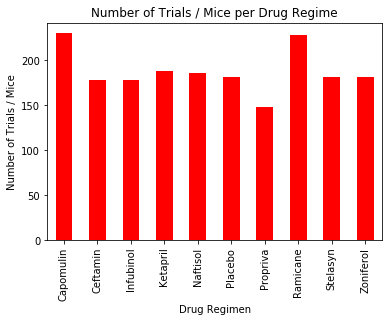

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
number_of_mice = summary_df[["Trials"]]

# Use DataFrame.plot to create a bar chart
plt.figure(figsize=(10,5))
number_of_mice.plot(kind="bar", color = "r", legend = False)

# Add titles. 
plt.title ("Number of Trials / Mice per Drug Regime")
plt.ylabel ("Number of Trials / Mice")

plt.show()

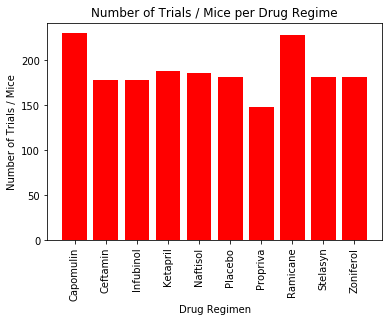

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
# using Matplotlib pyplot.

# Create x-axis
x_axis = np.arange(len(number_of_mice))
x_axis

# Create bar chart
plt.bar(x_axis, number_of_mice["Trials"], color='r', align="center")

# Add titles and details for x-axis
plt.title ("Number of Trials / Mice per Drug Regime")
plt.ylabel ("Number of Trials / Mice")
plt.xticks(x_axis, number_of_mice.index.values, rotation="vertical")
plt.xlabel ("Drug Regimen")

# Show plot
plt.show()

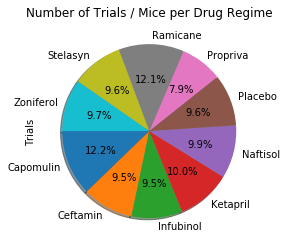

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

number_of_mice = summary_df[["Trials"]]

explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Use DataFrame.plot to create a bar chart
number_of_mice.plot(kind="pie", explode=explode, labels=number_of_mice.index.values, autopct="%1.1f%%", 
                    shadow=True, startangle=180, subplots=True, legend=False)

# Add titles.
plt.title("Number of Trials / Mice per Drug Regime")

plt.show()


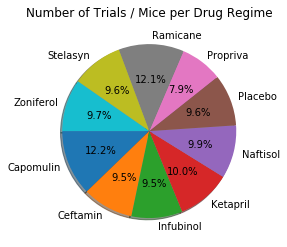

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

number_of_mice = summary_df[["Trials"]]

# Use DataFrame.plot to create a bar chart
plt.pie(number_of_mice['Trials'], explode=explode, labels=number_of_mice.index.values, autopct="%1.1f%%", 
       shadow=True, startangle=180)



# Add titles.
plt.title("Number of Trials / Mice per Drug Regime")

plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regime_df = clean_study_data.loc[(clean_study_data["Drug Regimen"] == "Capomulin") | 
                                          (clean_study_data["Drug Regimen"] == "Ramicane") |
                                         (clean_study_data["Drug Regimen"] == "Infubinol") |
                                         (clean_study_data["Drug Regimen"] == "Ceftamin")]
selected_regime_df

# Start by getting the last (greatest) timepoint for each mouse
selected_regime_df = selected_regime_df.sort_values("Timepoint", ascending = False)
selected_regime_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
selected_regime_df = selected_regime_df.drop_duplicates(subset = "Mouse ID", keep='first')
selected_regime_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1859,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1192,m756,Infubinol,Male,19,30,5,47.010364,1
1730,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1538,t573,Ceftamin,Female,15,27,0,45.000000,0


In [58]:
# Determine the quartiles and IQR
quartiles = selected_regime_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate the outlier boundaries
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Capture outliers in a new dataframe
outlier_data = selected_regime_df.loc[(selected_regime_df['Tumor Volume (mm3)'] < lower_bound) | 
                                      (selected_regime_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_data
    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [59]:
# Based on the above table not containing any mice name / details, it is assumed that there are no outliers. 

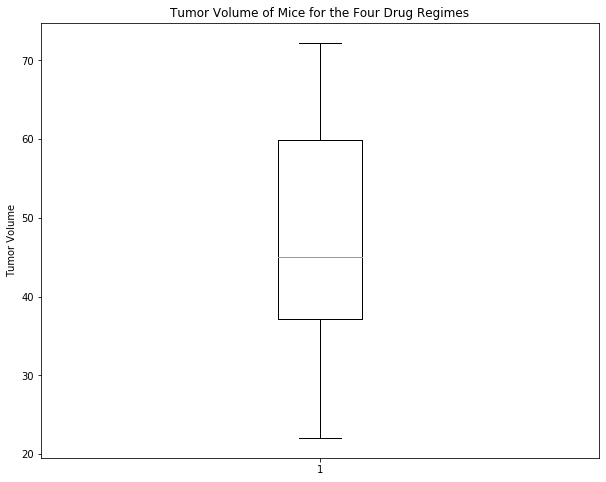

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,8))

tumor_size = selected_regime_df['Tumor Volume (mm3)']

plt.title('Tumor Volume of Mice for the Four Drug Regimes')
plt.ylabel('Tumor Volume')
plt.boxplot(tumor_size)
plt.show()

## Line and Scatter Plots

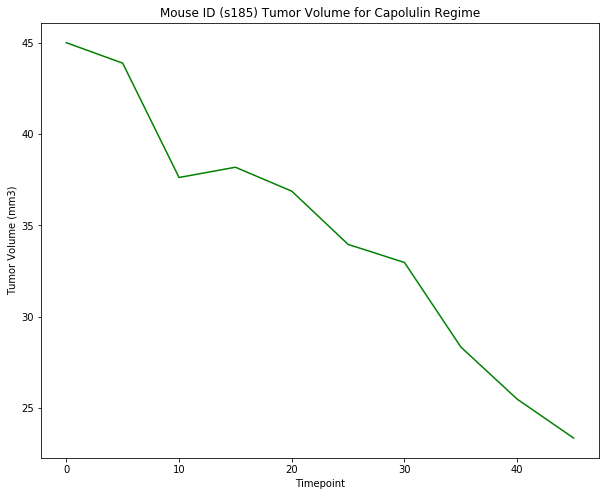

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Data filter for mice with Capomulin drug regime
mice_capomulin_df = clean_study_data.loc[(clean_study_data["Drug Regimen"] == "Capomulin")]
mice_capomulin_df

# Selected to create a dataframe from an individual mouse with ID (s185)
s185_mice_capomulin_df = mice_capomulin_df.set_index('Mouse ID')
mouse_s185 = s185_mice_capomulin_df.loc['s185']
mouse_s185.head(25)

# Data for X-Axis (Timepoint)
Timepoint = mouse_s185["Timepoint"]

# Data for Y-axis (Average Tumor Volume)
Tumor_Volume = mouse_s185["Tumor Volume (mm3)"]

# Create plot
plt.figure(figsize=(10,8))
S185_Tumor_Volume = plt.plot(Timepoint,Tumor_Volume, color="green")
plt.title('Mouse ID (s185) Tumor Volume for Capolulin Regime')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

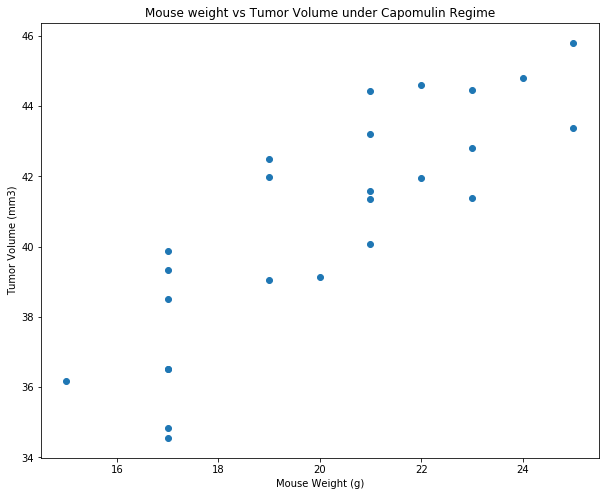

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Data for X-Axis (Mouse Weight)
mouse_weight_df = mice_capomulin_df.groupby(mice_capomulin_df["Mouse ID"])["Weight (g)"].mean()
mouse_weight_df

# Data for Y-axis (Average Tumor Volume)
tumor_volume_df = mice_capomulin_df.groupby(mice_capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
tumor_volume_df

# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(mouse_weight_df ,tumor_volume_df)
plt.title("Mouse weight vs Tumor Volume under Capomulin Regime")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The r-squared is: 0.709


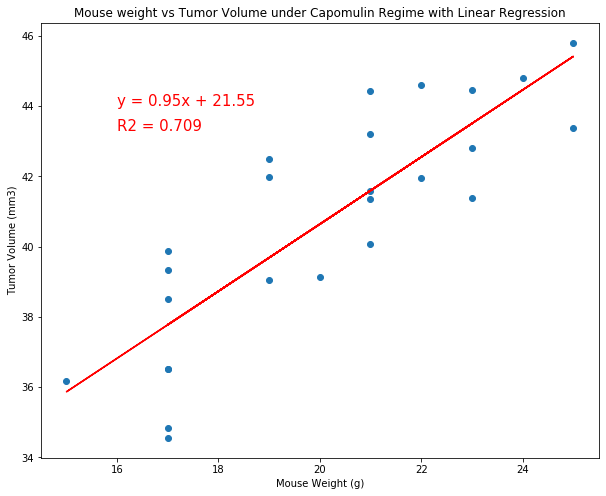

The correlation between Tumor Volume and Mouse Weight is: 0.842


In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Data for X-Axis (Mouse Weight)
mouse_weight_df = mice_capomulin_df.groupby(mice_capomulin_df["Mouse ID"])["Weight (g)"].mean()
mouse_weight_df

# Data for Y-axis (Average Tumor Volume)
tumor_volume_df = mice_capomulin_df.groupby(mice_capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
tumor_volume_df

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight_df, tumor_volume_df)

# Calculate the predictions for each value of x (Mouse Weight)
regression_values = mouse_weight_df * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(mouse_weight_df, tumor_volume_df)

# Plot the regression line
plt.plot(mouse_weight_df, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (16,44), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (16,43.3), fontsize=15, color="red")
plt.title("Mouse weight vs Tumor Volume under Capomulin Regime with Linear Regression")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(mouse_weight_df, tumor_volume_df)[0],3)
print(f"The correlation between Tumor Volume and Mouse Weight is: {correlation}")